In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a CSV file named 'your_dataset.csv'
# Replace 'your_dataset.csv' with the actual path to your file
data = pd.read_csv('Dataset.csv')

# Display the first few rows of the data to understand its structure
print(data.head())

  State Name county Name  State Code  County Code        Date  AQI Category  \
0    Alabama     Baldwin           1            3  2024-01-03   41     Good   
1    Alabama     Baldwin           1            3  2024-01-04   38     Good   
2    Alabama     Baldwin           1            3  2024-01-05   44     Good   
3    Alabama     Baldwin           1            3  2024-01-06    7     Good   
4    Alabama     Baldwin           1            3  2024-01-07   29     Good   

  Defining Parameter Defining Site  Number of Sites Reporting  
0              PM2.5   01-003-0010                          1  
1              PM2.5   01-003-0010                          1  
2              PM2.5   01-003-0010                          1  
3              PM2.5   01-003-0010                          1  
4              PM2.5   01-003-0010                          1  


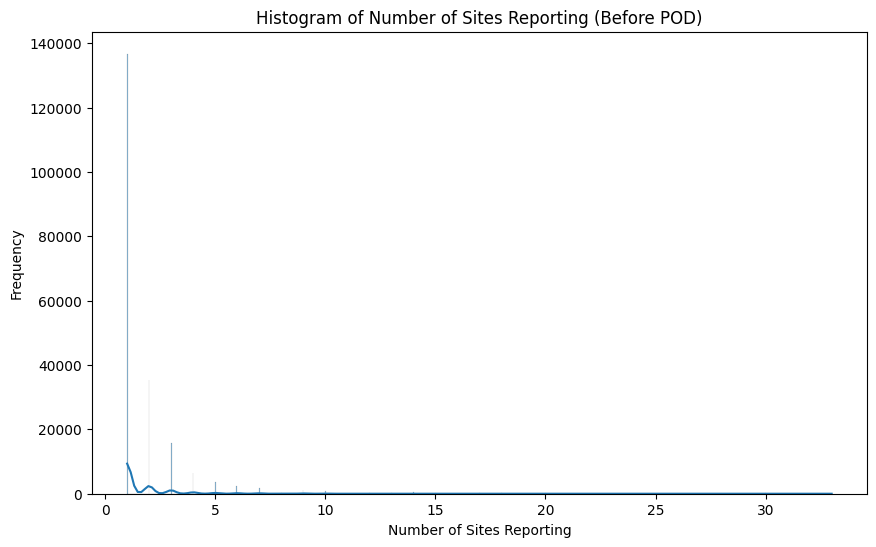

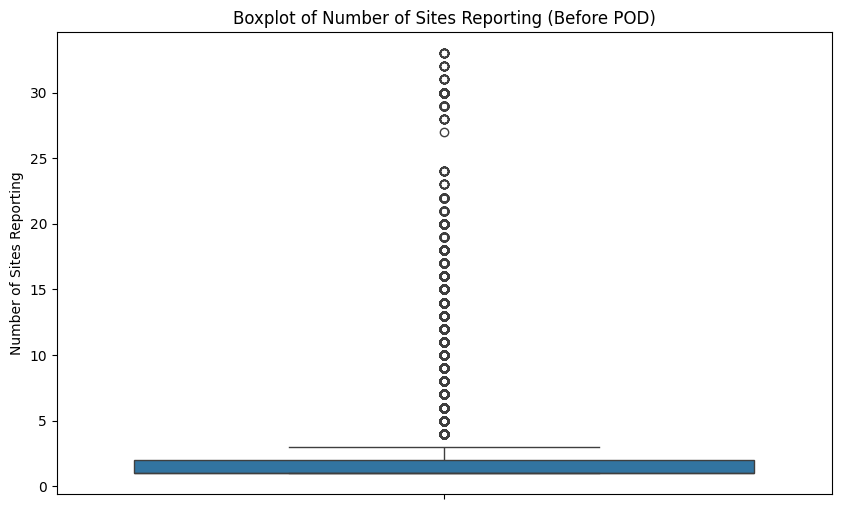

Descriptive Statistics (Before POD):
        Number of Sites Reporting
count              206919.000000
mean                    1.898095
std                     2.279127
min                     1.000000
25%                     1.000000
50%                     1.000000
75%                     2.000000
max                    33.000000


In [2]:
# Identify numerical columns suitable for POD
numerical_data = data[['Number of Sites Reporting']].copy() # Example: 'Number of Sites Reporting'

# Handle missing values
numerical_data.fillna(0, inplace=True)

# --- "Before" Visualizations ---

plt.figure(figsize=(10, 6))
sns.histplot(numerical_data['Number of Sites Reporting'], kde=True)
plt.title('Histogram of Number of Sites Reporting (Before POD)')
plt.xlabel('Number of Sites Reporting')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=numerical_data['Number of Sites Reporting'])
plt.title('Boxplot of Number of Sites Reporting (Before POD)')
plt.ylabel('Number of Sites Reporting')
plt.show()

print("Descriptive Statistics (Before POD):\n", numerical_data.describe())

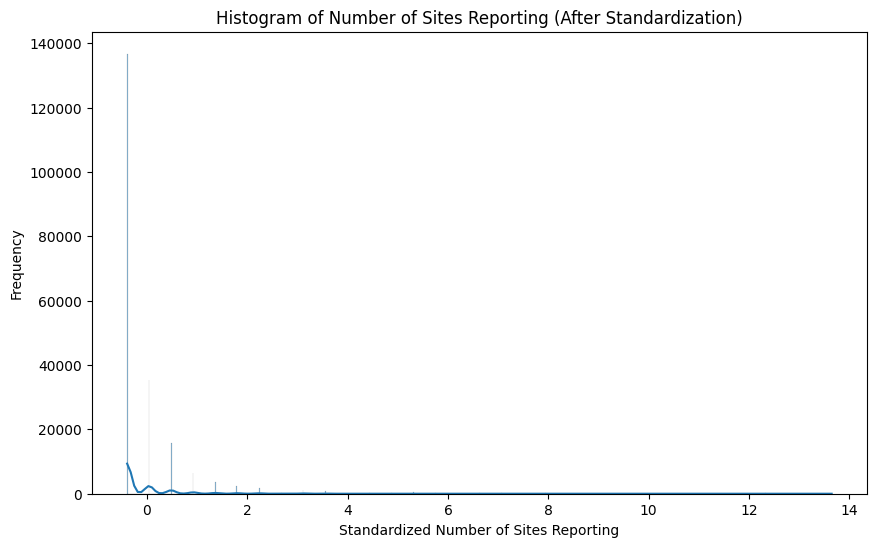

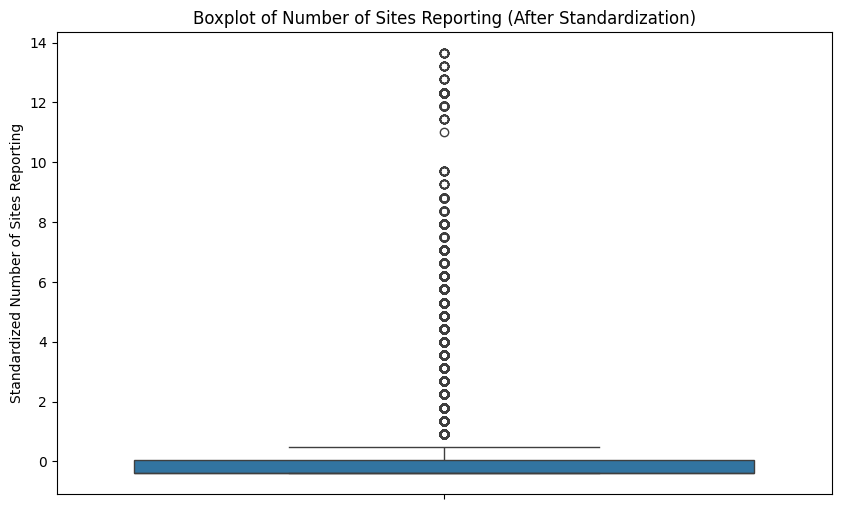

Descriptive Statistics (After Standardization):
        Number of Sites Reporting
count               2.069190e+05
mean               -1.186762e-16
std                 1.000002e+00
min                -3.940533e-01
25%                -3.940533e-01
50%                -3.940533e-01
75%                 4.471223e-02
max                 1.364644e+01

Shape of scaled data: (206919, 1)
First few rows of scaled data:
 [[-0.39405327]
 [-0.39405327]
 [-0.39405327]
 [-0.39405327]
 [-0.39405327]]


In [3]:
# Standardize the numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Convert scaled_data back to DataFrame for easier plotting if needed
scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)

# --- "During" Visualization: Effect of Standardization ---

plt.figure(figsize=(10, 6))
sns.histplot(scaled_df['Number of Sites Reporting'], kde=True)
plt.title('Histogram of Number of Sites Reporting (After Standardization)')
plt.xlabel('Standardized Number of Sites Reporting')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=scaled_df['Number of Sites Reporting'])
plt.title('Boxplot of Number of Sites Reporting (After Standardization)')
plt.ylabel('Standardized Number of Sites Reporting')
plt.show()

print("Descriptive Statistics (After Standardization):\n", scaled_df.describe())

print("\nShape of scaled data:", scaled_data.shape)
print("First few rows of scaled data:\n", scaled_data[:5])

In [5]:
# Cell 4 Revised: Variance Calculation (No SVD needed for 1D data)
import numpy as np
import matplotlib.pyplot as plt

# Calculate variance directly for the scaled data
variance = np.var(scaled_data, axis=0) # variance along axis 0 (columns)
explained_variance_ratio_1d = variance / np.sum(variance) # In 1D case, will be 1.0

print("Variance of Scaled 'Number of Sites Reporting':", variance)
print("\nExplained Variance Ratio (for 1D data, should be 1.0):", explained_variance_ratio_1d)

# No need for U, S, V or plotting explained variance in the same way as multi-dimensional POD
# Because we only have one component, variance is already directly available.

Variance of Scaled 'Number of Sites Reporting': [1.]

Explained Variance Ratio (for 1D data, should be 1.0): [1.]


In [6]:
# Cell 5 Revised: Number of components - always 1 for 1D data

n_components = 1 # For 1D data, the number of components is just 1

print(f"\nNumber of components to explain 100% variance (for 1D data): {n_components}")


Number of components to explain 100% variance (for 1D data): 1


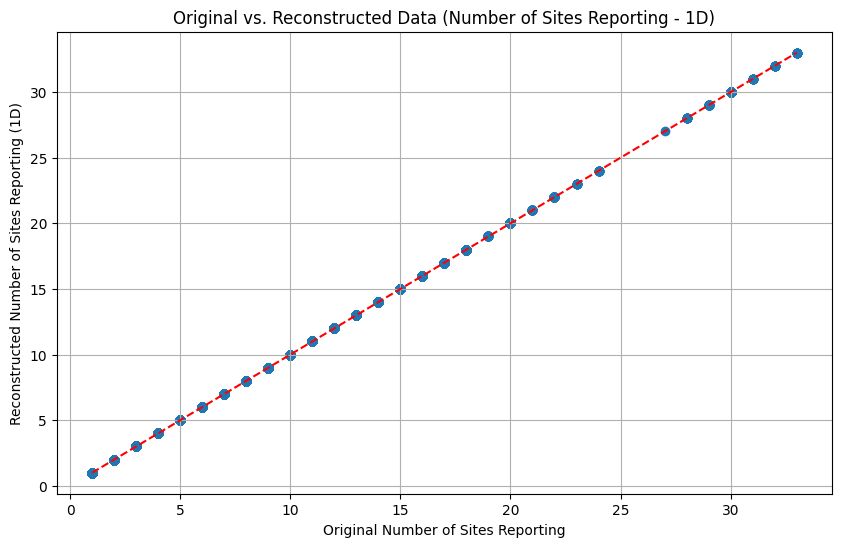

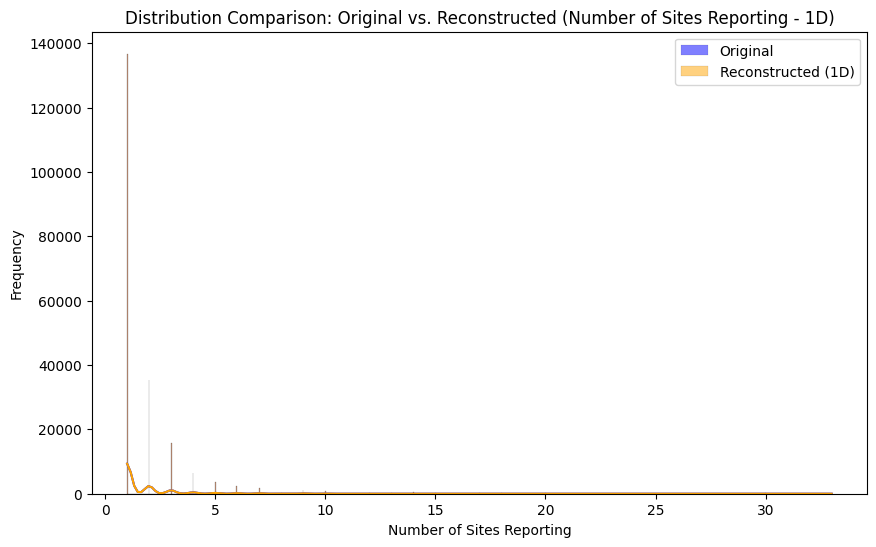


Shape of reconstructed data in original scale (1D): (206919, 1)

First few rows of reconstructed data in original scale (1D):
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [7]:
# Cell 6 Revised: Reconstruction - Trivial for 1D data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# For 1D, "reconstructing" with 1 component is essentially keeping the original data (after standardization and inverse transform)
# Or in the reduced form, it's just projection onto the direction of the variable itself.

# We can just use the original scaled data (or inverse transformed scaled data) as the "reconstructed" version.
reduced_data_reconstructed_1d = scaled_data  # Reduced data is same as scaled data in 1D
original_scale_reconstructed_data_1d = scaler.inverse_transform(reduced_data_reconstructed_1d)
reconstructed_df_1d = pd.DataFrame(original_scale_reconstructed_data_1d, columns=numerical_data.columns)


# --- "After Reconstruction" Visualizations (for 1D - mostly for verification) ---

plt.figure(figsize=(10, 6))
plt.scatter(numerical_data['Number of Sites Reporting'], reconstructed_df_1d['Number of Sites Reporting'])
plt.xlabel('Original Number of Sites Reporting')
plt.ylabel('Reconstructed Number of Sites Reporting (1D)')
plt.title('Original vs. Reconstructed Data (Number of Sites Reporting - 1D)')
plt.plot([numerical_data['Number of Sites Reporting'].min(), numerical_data['Number of Sites Reporting'].max()],
         [numerical_data['Number of Sites Reporting'].min(), numerical_data['Number of Sites Reporting'].max()],
         color='red', linestyle='--') # Diagonal line for reference
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(numerical_data['Number of Sites Reporting'], kde=True, label='Original', color='blue')
sns.histplot(reconstructed_df_1d['Number of Sites Reporting'], kde=True, label='Reconstructed (1D)', color='orange')
plt.title('Distribution Comparison: Original vs. Reconstructed (Number of Sites Reporting - 1D)')
plt.xlabel('Number of Sites Reporting')
plt.ylabel('Frequency')
plt.legend()
plt.show()


print("\nShape of reconstructed data in original scale (1D):", original_scale_reconstructed_data_1d.shape)
print("\nFirst few rows of reconstructed data in original scale (1D):\n", original_scale_reconstructed_data_1d[:5])